# 2.3 SOO for 2D vector field

In [1]:
%matplotlib inline
import sys
import os

# Sort the paths out to run from this file
parent_path = os.path.dirname(os.getcwd())
src_path = os.path.join(os.path.sep,parent_path, 'src')
sys.path.append(src_path)
print(src_path)

/home/dharrington/cyclops/src


Description

In [2]:
from run_me import *


# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = GraphManager()
true_temp_field = pickle_manager.read_file('simulation', 'disp_plane_field.obj')
grid = pickle_manager.read_file('simulation', 'disp_plane_points.obj')

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds+np.array([[1, 1], [-1, -1]])*0.002

description

In [3]:
# Setup the symmetry
symmetry_manager = SymmetryManager()
symmetry_manager.set_2D_x(np.mean(field_bounds[:, 0]))

# Setup the sensor suite
def f(x): return np.zeros(x.shape)
sensor = PointSensor(0, f, 0, np.array([[-5e10, -5e10, -5e10], [5e10, 5e10, 5e10]]), 2)
sensors = np.array([sensor]*5)

# def f(x): return np.zeros(x.shape)
# sensor = MultiSensor(0, f, 0.1, np.array([[-5e10, -5e10, -5e10], [5e10, 5e10, 5e10]]), np.linspace(sensor_bounds[0, 0], sensor_bounds[1, 0], 10).reshape(-1, 2))
# sensors = np.array([sensor])

sensor_suite = SensorSuite(
    VectorField(RBFModel, field_bounds), 
    sensors,
    symmetry=[symmetry_manager.reflect_2D_horiz]
)

description

In [4]:
# Setup the experiment
optimiser = PSOOptimiser('00:00:10')
experiment = Experiment(
    true_temp_field,
    grid,
    optimiser
)
experiment.plan_soo(
    sensor_suite,
    sensor_bounds
)
res = experiment.design()
proposed_layout, true_disps, model_disps, sensor_vals = experiment.get_SOO_plotting_arrays(res.X)

n_gen  |  n_eval  |    f     |    S    |    w    |    c1    |    c2    |     f_avg     |     f_min    
     1 |       30 |        - |       - |  0.9000 |  2.00000 |  2.00000 |  9.871195E-11 |  5.556388E-11
     2 |       60 |  0.36225 |       2 |  0.6310 |  2.04346 |  1.95654 |  8.169948E-11 |  5.381108E-11
     3 |       90 |  0.25192 |       2 |  0.5621 |  2.08425 |  1.91575 |  7.562120E-11 |  5.381108E-11
     4 |      120 |  0.07350 |       3 |  0.4466 |  2.08250 |  1.93854 |  6.832652E-11 |  5.245955E-11
     5 |      150 |  0.00963 |       3 |  0.4060 |  2.07032 |  1.95293 |  6.391414E-11 |  4.952706E-11
     6 |      180 |  0.03616 |       3 |  0.4228 |  2.05742 |  1.96461 |  5.951874E-11 |  4.651672E-11
     7 |      210 | -1.7E-02 |       3 |  0.3896 |  2.04548 |  1.97463 |  5.359355E-11 |  4.201317E-11
     8 |      240 | -1.8E-02 |       3 |  0.3890 |  2.03464 |  1.98767 |  4.971068E-11 |  4.000476E-11
     9 |      270 | -1.5E-02 |       3 |  0.3908 |  2.02293 |  2.00125 | 

decription

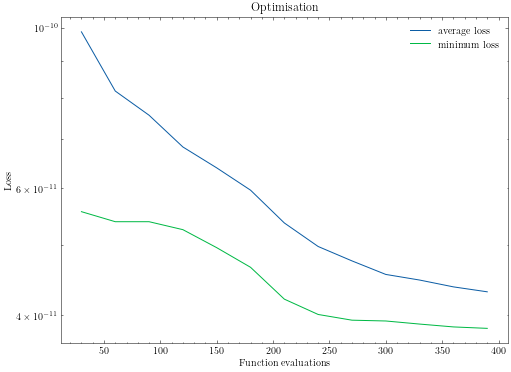

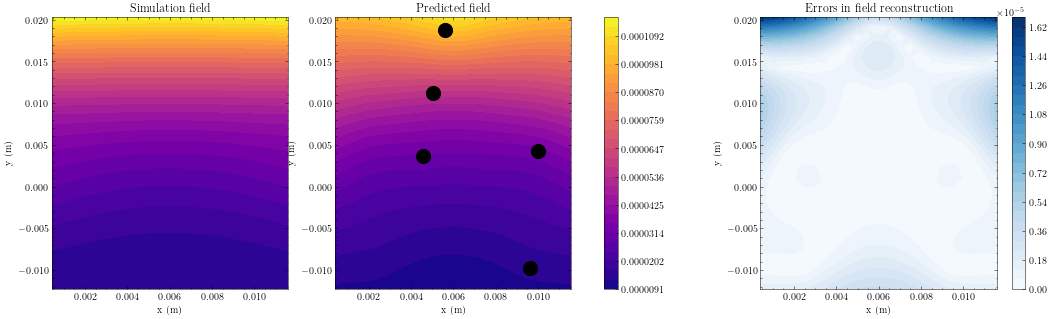

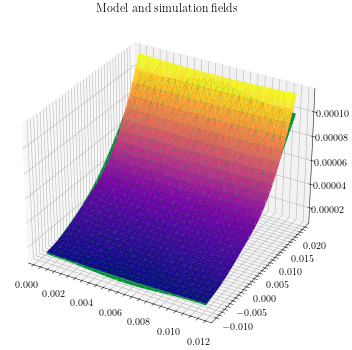

In [5]:
mag_true_disps = np.linalg.norm(true_disps, axis=1).reshape(-1, 1)
mag_model_disps = np.linalg.norm(model_disps, axis=1).reshape(-1, 1)
mag_sensor_vals = np.linalg.norm(sensor_vals, axis=1).reshape(-1, 1)

# Display the results
graph_manager.build_optimisation(
    res.history
)
graph_manager.draw()
graph_manager.build_2D_compare(
    grid,
    proposed_layout,
    mag_true_disps,
    mag_model_disps
)
graph_manager.draw()
graph_manager.build_3D_compare(
    grid,
    mag_true_disps,
    mag_model_disps
)
graph_manager.draw()